
# Como o MLP Aprende: Função de Custo e Otimizadores

Nesta aula, vamos entender o que acontece por trás dos comandos `model.compile()` e `model.fit()`: como a rede mede o erro e como decide corrigir seus pesos para melhorar.


## Funções de Custo e Otimizadores

Durante o aprendizado, a rede tenta **melhorar suas previsões** ajustando os pesos das conexões entre neurônios.  
Mas para isso, ela precisa saber duas coisas fundamentais:

1. **O quanto ela está errando** (isso é medido pela *função de custo*);  
2. **Como corrigir esse erro** (isso é decidido pelo *otimizador*).

---

### A Função de Custo (*Loss Function*)

A função de custo é uma medida do erro do modelo.  
Ela compara o que a rede previu com o valor correto e retorna um número que indica o quão errado o modelo está.

> 💬 Pense nela como um **termômetro do erro**:
> - Se o valor do *loss* é alto → o modelo errou muito.  
> - Se o valor do *loss* é baixo → o modelo acertou bem.

Durante o treinamento, o objetivo do modelo é **diminuir esse valor o máximo possível**, ajustando seus pesos a cada época.

---

### O Otimizador (*Optimizer*)

O otimizador é o “motor” que faz o modelo aprender.  
Ele decide **como os pesos da rede serão alterados** para reduzir o erro medido pela função de custo.

> Imagine o modelo tentando descer uma montanha na neblina:  
> ele só sente o chão e precisa decidir **para que lado descer** e **o tamanho do passo** a cada movimento.  
> O otimizador é quem guia esse processo.

- Ele calcula a **direção** em que o erro diminui mais rápido (o gradiente);  
- E escolhe **o tamanho do passo** (controlado pela taxa de aprendizado (*learning rate*)).

---

### Como as duas partes se conectam

1. A rede faz uma previsão.  
2. A função de custo mede o erro.  
3. O otimizador usa esse erro para ajustar os pesos da rede.  
4. O processo se repete várias vezes (épocas) até que o erro pare de diminuir.

Em resumo:

| Conceito | Pergunta que responde | Exemplo no código |
|-----------|------------------------|------------------|
| **Função de custo (loss)** | “O quanto o modelo está errando?” | `'sparse_categorical_crossentropy'` |
| **Otimizador (optimizer)** | “Como posso reduzir esse erro?” | `'adam'`, `'sgd'`, `'rmsprop'` |
| **Learning rate** | “Qual o tamanho do passo que devo dar?” | `learning_rate=0.001` |

---

## Principais Funções de Custo (*Loss Functions*) e Otimizadores (*Optimizers*) no TensorFlow

A tabela abaixo resume as principais opções do TensorFlow/Keras e um indicativo de **quando usar cada uma**.

---

### Funções de Custo (Loss)

| Função de Custo | Tipo de problema | Descrição simplificada | Quando usar |
|-----------------|------------------|--------------------------|--------------|
| **Mean Squared Error (MSE)** | Regressão | Mede o erro quadrático médio entre valores previstos e reais. Penaliza erros grandes. | Problemas de previsão numérica (ex: temperatura, preço, velocidade). |
| **Mean Absolute Error (MAE)** | Regressão | Mede a média das diferenças absolutas entre previsões e valores reais. | Quando queremos que o modelo seja mais robusto a valores extremos (*outliers*). |
| **Binary Crossentropy** | Classificação binária | Mede a diferença entre probabilidades previstas e rótulos (0 ou 1). | Classificação com duas classes (ex: gato vs cachorro). |
| **Categorical Crossentropy** | Classificação multiclasse (one-hot) | Mede o erro entre as probabilidades previstas e as classes reais codificadas em *one-hot*. | Classificação com múltiplas classes (ex: dígitos 0–9). |
| **Sparse Categorical Crossentropy** | Classificação multiclasse (inteiros) | Igual à anterior, mas usa rótulos inteiros em vez de *one-hot*. | Classificação multiclasse quando os rótulos são números inteiros (como o MNIST). |
| **Huber Loss** | Regressão robusta | Combina MSE e MAE, penalizando menos valores extremos. | Regressão onde há ruídos ou valores atípicos. |
| **KLDivergence (Kullback-Leibler Divergence)** | Distribuições de probabilidade | Mede a diferença entre duas distribuições de probabilidade. | Modelos probabilísticos, autoencoders variacionais. |
| **Poisson / Cosine Similarity** | Casos específicos | Avaliam erros baseados em relações ou intensidades. | Poisson: contagens (eventos). Cosine: similaridade de vetores. |

---

### Otimizadores (Optimizers)

| Otimizador | Como funciona | Vantagens | Quando usar |
|-------------|----------------|------------|--------------|
| **SGD (Stochastic Gradient Descent)** | Atualiza os pesos a cada lote com base no gradiente local. | Simples e eficiente em bases pequenas; bom para aprendizado controlado. | Quando se quer entender o aprendizado passo a passo ou testar configurações básicas. |
| **SGD + Momentum** | Usa a direção anterior do gradiente para ganhar “impulso” nas descidas. | Acelera o aprendizado em terrenos irregulares. | Quando o gradiente oscila muito e o aprendizado é instável. |
| **RMSProp** | Ajusta dinamicamente o tamanho do passo para cada peso, com base na média recente dos gradientes. | Funciona bem em problemas com gradientes ruidosos. | RNNs, séries temporais, dados não estacionários. |
| **Adam (Adaptive Moment Estimation)** | Combina Momentum e RMSProp — adapta o passo e guarda histórico dos gradientes. | Rápido, estável e quase sempre eficiente. | Escolha padrão para a maioria dos problemas (incluindo o MNIST). |
| **Adagrad** | Diminui o passo de aprendizado conforme um peso é atualizado várias vezes. | Se adapta bem a variáveis com escalas diferentes. | Dados esparsos ou NLP (ex: embeddings). |
| **Adadelta** | Variação do Adagrad com passo adaptativo e menor decaimento. | Resolve o problema do Adagrad de reduzir demais o learning rate. | Quando o Adagrad começa a “parar de aprender”. |
| **Nadam (Nesterov-accelerated Adam)** | Versão do Adam com antecipação do gradiente (Nesterov). | Aprendizado mais rápido e estável em alguns casos. | Alternativa moderna ao Adam em tarefas complexas. |
| **FTRL** | Usa regularização L1/L2 combinada com aprendizado adaptativo. | Muito eficiente para dados esparsos e grandes volumes. | Sistemas de recomendação e modelos lineares. |

---

### Dica prática

- Para **começar um projeto**, use:
  ```python
  optimizer='adam'
  loss='sparse_categorical_crossentropy'
  ```
  Funciona bem na maioria dos problemas de classificação.

- Depois, **experimente trocar o otimizador ou a função de custo** e observe o impacto no aprendizado. Isso ajuda a desenvolver uma intuição sobre o funcionamento interno das redes neurais.

In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Versão one-hot dos rótulos (para categorical_crossentropy)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



## Comparando Funções de Custo

As funções de custo determinam **como o erro é medido**.  
Aqui vamos comparar duas delas e observar como se comportam.

> Algumas funções **esperam formatos diferentes de rótulos**:
> - `categorical_crossentropy` → espera *vetores one-hot* (ex: `[0,0,0,1,0,0,0,0,0,0]` para o número 3)  
> - `sparse_categorical_crossentropy` → aceita rótulos inteiros (ex: `3`)

Abaixo, o código já trata isso automaticamente para mostrar as duas em ação.



Treinando com loss = categorical_crossentropy
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8667 - loss: 0.4701 - val_accuracy: 0.9526 - val_loss: 0.1604
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9607 - loss: 0.1340 - val_accuracy: 0.9657 - val_loss: 0.1160
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9729 - loss: 0.0897 - val_accuracy: 0.9688 - val_loss: 0.1031
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9805 - loss: 0.0636 - val_accuracy: 0.9728 - val_loss: 0.0889
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9869 - loss: 0.0472 - val_accuracy: 0.9731 - val_loss: 0.0928

Treinando com loss = sparse_categorical_crossentropy
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8681 - loss: 0.4720 - val_accuracy: 0.9548 - val_loss: 0.1554
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9591 - loss: 0.1395 - val_accuracy: 0.9632 - val_loss: 0.1

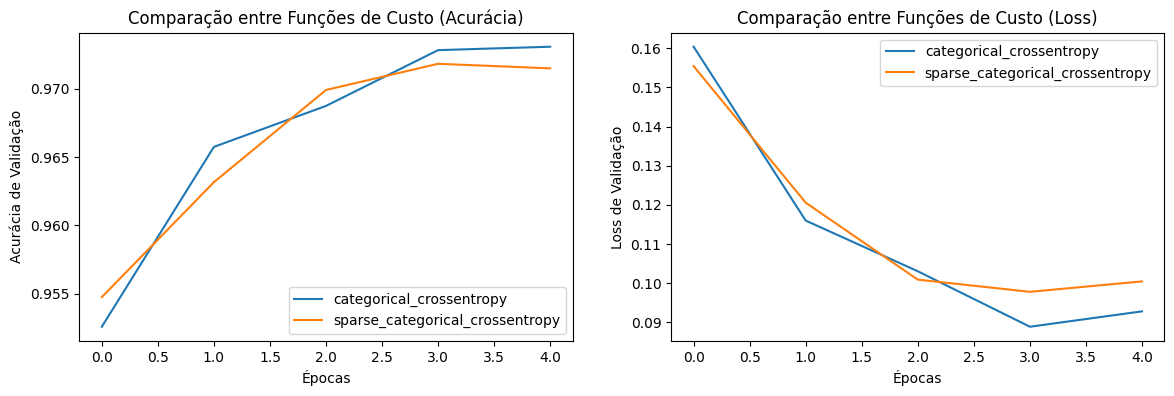

In [7]:
def criar_modelo():
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

losses = ['categorical_crossentropy', 'sparse_categorical_crossentropy']
histories = {}

for loss in losses:
    print(f"\nTreinando com loss = {loss}")
    model = criar_modelo()

    # Ajuste automático do formato de rótulos
    if loss == 'categorical_crossentropy':
        y_train_use, y_test_use = y_train_cat, y_test_cat
    else:
        y_train_use, y_test_use = y_train, y_test

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    h = model.fit(x_train, y_train_use, epochs=5, validation_split=0.2, verbose=1)
    histories[loss] = h.history


plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
for loss in losses:
    plt.plot(histories[loss]['val_accuracy'], label=loss)
plt.title('Comparação entre Funções de Custo (Acurácia)')
plt.xlabel('Épocas')
plt.ylabel('Acurácia de Validação')
plt.legend()

plt.subplot(1, 2, 2)
for loss in losses:
    plt.plot(histories[loss]['val_loss'], label=loss)
plt.title('Comparação entre Funções de Custo (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss de Validação')
plt.legend()

plt.show()


## Comparando Otimizadores

Agora vamos testar diferentes otimizadores e ver como eles influenciam a taxa e a estabilidade do aprendizado.



Treinando com otimizador = sgd
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7139 - loss: 1.1009 - val_accuracy: 0.8988 - val_loss: 0.3754
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9003 - loss: 0.3674 - val_accuracy: 0.9147 - val_loss: 0.3044
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9141 - loss: 0.3091 - val_accuracy: 0.9247 - val_loss: 0.2724
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9233 - loss: 0.2762 - val_accuracy: 0.9307 - val_loss: 0.2501
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9274 - loss: 0.2586 - val_accuracy: 0.9348 - val_loss: 0.2351

Treinando com otimizador = adam
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8626 - loss: 0.4863 - val_accuracy: 0.9563 - val_loss: 0.1556
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9596 - loss: 0.1374 - val_accuracy: 0.9682 - val_loss: 0.1102
Epoch 3/5
1500/1500 ━━━━━━━━━━━━

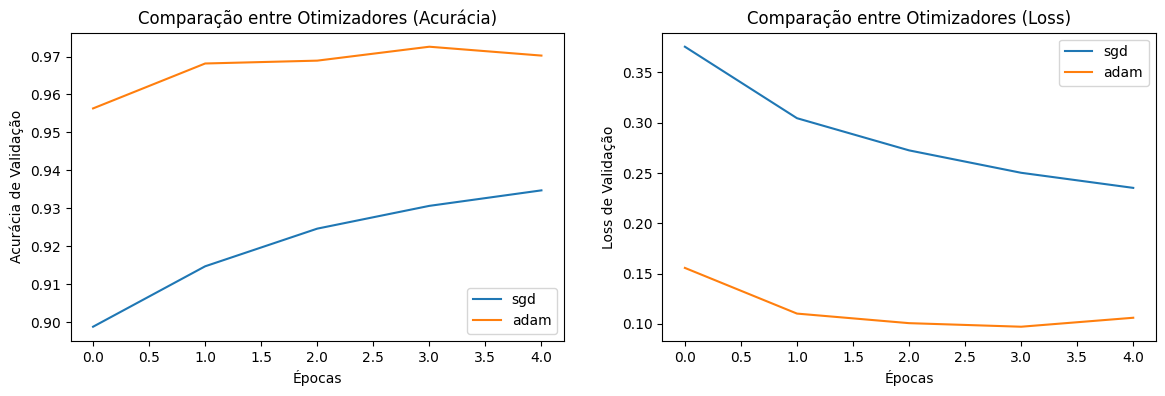

In [9]:

optimizers = ['sgd', 'adam']
histories_opt = {}

for opt in optimizers:
    print(f"\nTreinando com otimizador = {opt}")
    model = criar_modelo()
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    h = model.fit(x_train, y_train, epochs=5, validation_split=0.2, verbose=1)
    histories_opt[opt] = h.history

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
for opt in optimizers:
    plt.plot(histories_opt[opt]['val_accuracy'], label=opt)
plt.title('Comparação entre Otimizadores (Acurácia)')
plt.xlabel('Épocas')
plt.ylabel('Acurácia de Validação')
plt.legend()

plt.subplot(1, 2, 2)
for opt in optimizers:
    plt.plot(histories_opt[opt]['val_loss'], label=opt)
plt.title('Comparação entre Otimizadores (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss de Validação')
plt.legend()

plt.show()


## Atividade - Breast Cancer Wisconsin Dataset – Classificação binária

- Utilize o código abaixo para carregar os dados do dataset sobre câncer de mama e treine diferentes redes MLP, variando as funções de custo e os otimizadores.

```python
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
```
